Project: COVID-19 Data Analysis and Visualization Dashboard

Steps:

Data Collection:

Use APIs or web scraping to collect COVID-19 data from reliable sources (e.g., Johns Hopkins University, WHO, or your local health authority).
Practice working with APIs and parsing JSON data or HTML.


Data Cleaning and Preprocessing:

Clean the collected data, handling missing values and inconsistencies.
Convert data types as needed and create derived features (e.g., calculating rates or moving averages).


Exploratory Data Analysis (EDA):

Use pandas for data manipulation and analysis.
Generate descriptive statistics and create visualizations using matplotlib or seaborn.


Time Series Analysis:

Analyze trends and patterns in COVID-19 cases over time.
Implement basic forecasting models (e.g., ARIMA or Prophet).


Geospatial Analysis:

Use libraries like geopandas to create maps showing the spread of COVID-19.
Implement choropleth maps to visualize data by region.


Dashboard Creation:

Build an interactive dashboard using a library like Dash or Streamlit.
Include various charts, maps, and user controls for data exploration.


Data Pipeline and Automation:

Create a data pipeline to automatically update your dashboard with the latest data.
Use scheduling tools like cron or libraries like APScheduler.


Basic Machine Learning:

Implement a simple prediction model (e.g., predicting future cases based on current trends and factors).
Use scikit-learn for model creation and evaluation.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/day_wise.csv")
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [3]:
df.tail()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187


# cleaning

In [13]:
print(df.isnull().sum())

Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64


In [19]:
df["dailychange"] = df["Confirmed"].diff()
df["newcases_7_day_avg"] = df['dailychange'].rolling(window=7).mean()
df.head(21)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,dailychange,newcases_7_day_avg
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,NaN,NaN
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,99.0,NaN
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,287.0,NaN
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,493.0,NaN
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,684.0,NaN
5,2020-01-27,2927,82,61,2784,809,26,9,2.80,2.08,134.43,16,809.0,NaN
6,2020-01-28,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16,2651.0,NaN
7,2020-01-29,6166,133,125,5908,588,2,18,2.16,2.03,106.40,18,588.0,801.571429
8,2020-01-30,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20,2068.0,1082.857143
9,2020-01-31,9927,213,219,9495,1693,42,78,2.15,2.21,97.26,24,1693.0,1283.714286


# exploratory

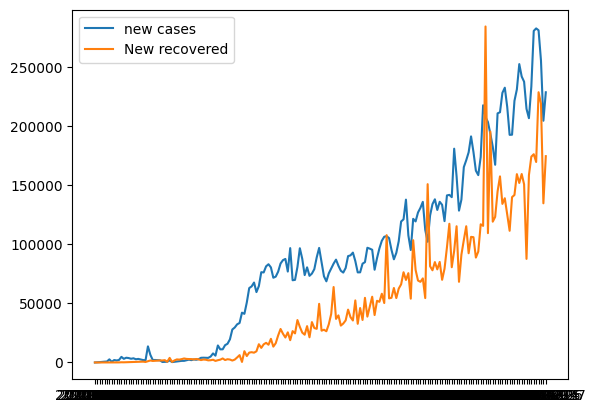

In [10]:
plt.plot(df['Date'], df["New cases"] , label= "new cases")
plt.plot(df['Date'], df["New recovered"] , label= "New recovered")
plt.legend()
plt.show()

c:\Users\bramv\miniconda3\envs\tf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


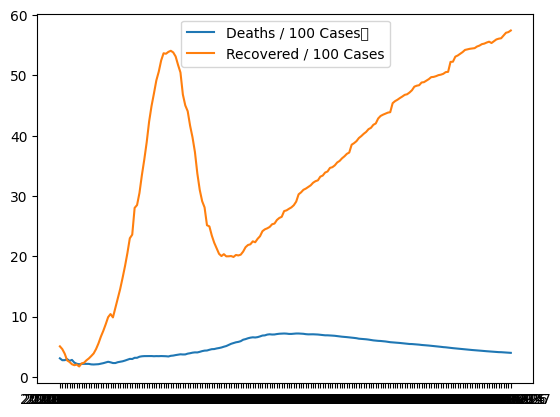

In [12]:
plt.plot(df['Date'], df["Deaths / 100 Cases"] , label= "Deaths / 100 Cases	")
plt.plot(df['Date'], df["Recovered / 100 Cases"] , label= "Recovered / 100 Cases")
plt.legend()
plt.show()
